## The dataset consists of information about 2.9 million properties and is grouped into 2 files:

- properties_2016.csv (containing information about the properties themselves)
- train_2016.csv (containing information about the transcations)
- Let’s look at the dataset:

In [1]:
import os
from os import listdir
from os.path import isfile, join
import glob
import string
import operator
import csv
import datetime
import pandas as pd
import calendar
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
#import plotly.graph_objs.Scattergl as sc
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
import re
import warnings
warnings.filterwarnings("ignore")

- First we will look at properties file 

In [2]:
properties_df = pd.read_csv('data\\properties_2016.csv', low_memory=False)
print('Shape of properties dataset is : ', properties_df.shape)

Shape of properties dataset is :  (2985217, 58)


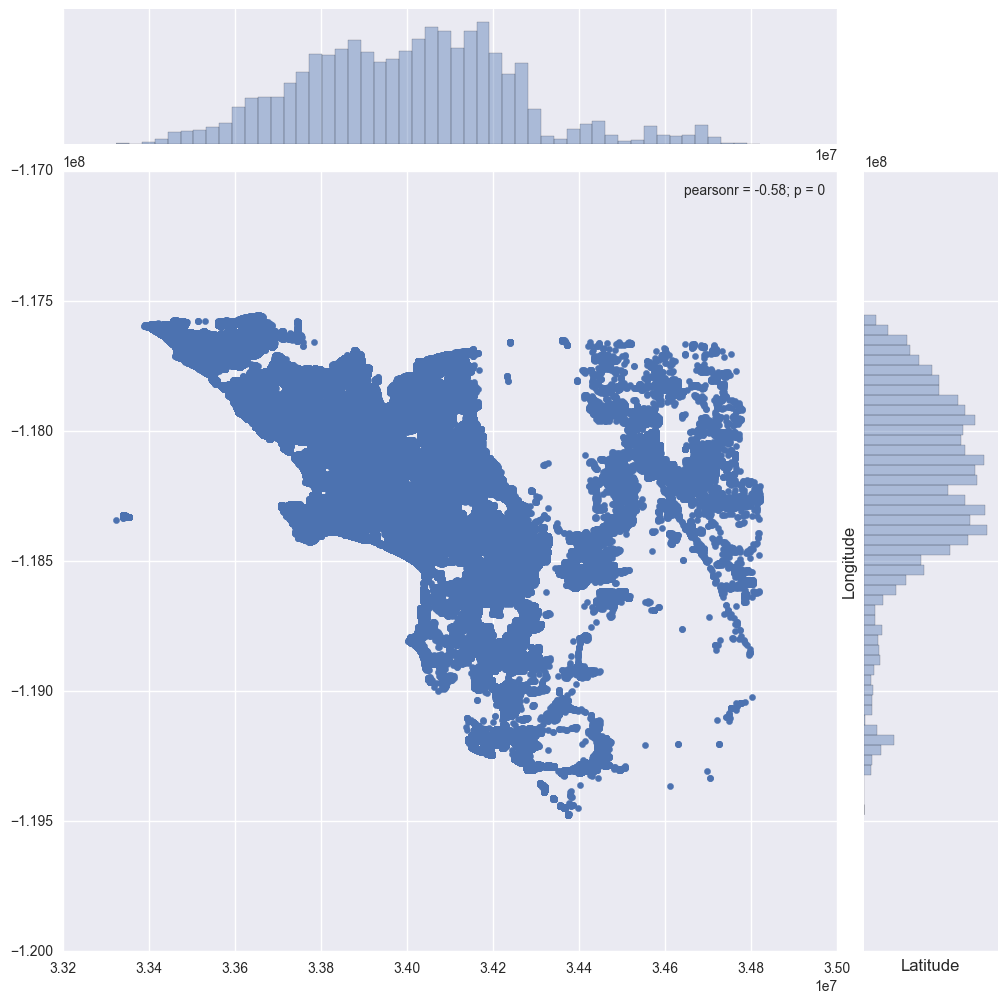

In [3]:
plt.figure(figsize=(12,12))
sns.jointplot(x=properties_df.latitude.values, y=properties_df.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

- There are lot of null values in this data. Lets try and see which column has how many null aso that we can decide what we will do to clear those values 
- Below are top 10 columns with maximum null values


In [4]:
missing_value = properties_df.isnull().sum()
missing_value[:10]

parcelid                          0
airconditioningtypeid       2173698
architecturalstyletypeid    2979156
basementsqft                2983589
bathroomcnt                   11462
bedroomcnt                    11450
buildingclasstypeid         2972588
buildingqualitytypeid       1046729
calculatedbathnbr            128912
decktypeid                  2968121
dtype: int64

- Now lets put these values in graph to get better view

In [5]:
missing_value_df=pd.DataFrame({'Column_Name':missing_value.index, 'Count':missing_value.values})
missing_value_df=missing_value_df.sort_values(['Count'], ascending=False)
missing_value_df.head()

Column_Name    Count
41               storytypeid  2983593
3               basementsqft  2983589
46        yardbuildingsqft26  2982570
49             fireplaceflag  2980054
2   architecturalstyletypeid  2979156

In [6]:
trace1 = go.Bar(
    y=missing_value_df.Column_Name.values,
    x=missing_value_df.Count.values,
    name='SF Zoo',
    orientation = 'h',
    marker = dict(
        color = 'rgba(246, 78, 139, 0.6)',
        line = dict(
            color = 'rgba(246, 78, 139, 1.0)',
            width = 3)
    )
)
data = [trace1]
layout = go.Layout(
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='marker-h-bar')

# Air condition type analysis. 
- Below id the graph which will indicate how many homes are sold by illow according to aircondition type

In [7]:
df_airconditioningtype = properties_df[['airconditioningtypeid']].copy()

df_airconditioningtype['AirConditioningDesc'] = 'Information Missing'
df_airconditioningtype.ix[df_airconditioningtype['airconditioningtypeid'] == 1.0, 'AirConditioningDesc'] = 'Central'
df_airconditioningtype.ix[df_airconditioningtype['airconditioningtypeid'] == 2.0, 'AirConditioningDesc'] = 'Chilled Water'
df_airconditioningtype.ix[df_airconditioningtype['airconditioningtypeid'] == 3.0, 'AirConditioningDesc'] = 'Evaporative Cooler'
df_airconditioningtype.ix[df_airconditioningtype['airconditioningtypeid'] == 4.0, 'AirConditioningDesc'] = 'Geo Thermal'
df_airconditioningtype.ix[df_airconditioningtype['airconditioningtypeid'] == 5.0, 'AirConditioningDesc'] = 'None'
df_airconditioningtype.ix[df_airconditioningtype['airconditioningtypeid'] == 6.0, 'AirConditioningDesc'] = 'Other'
df_airconditioningtype.ix[df_airconditioningtype['airconditioningtypeid'] == 7.0, 'AirConditioningDesc'] = 'Packaged AC Unit'
df_airconditioningtype.ix[df_airconditioningtype['airconditioningtypeid'] == 8.0, 'AirConditioningDesc'] = 'Partial'
df_airconditioningtype.ix[df_airconditioningtype['airconditioningtypeid'] == 9.0, 'AirConditioningDesc'] = 'Refrigeration'
df_airconditioningtype.ix[df_airconditioningtype['airconditioningtypeid'] == 10.0, 'AirConditioningDesc'] = 'Ventilation'
df_airconditioningtype.ix[df_airconditioningtype['airconditioningtypeid'] == 11.0, 'AirConditioningDesc'] = 'Wall Unit'
df_airconditioningtype.ix[df_airconditioningtype['airconditioningtypeid'] == 12.0, 'AirConditioningDesc'] = 'Window Unit'
df_airconditioningtype.ix[df_airconditioningtype['airconditioningtypeid'] == 13.0, 'AirConditioningDesc'] = 'Yes'

df_airconditioningtype['airconditioningtypeid'] = df_airconditioningtype['airconditioningtypeid'].fillna(9999.0)

df_airconditioningtype_counts = df_airconditioningtype.groupby("AirConditioningDesc").aggregate('count').reset_index()

df_airconditioningtype_counts.head(20)

AirConditioningDesc  airconditioningtypeid
0              Central                 742364
1   Evaporative Cooler                      7
2  Information Missing                2173698
3                 None                   8795
4        Refrigeration                     19
5            Wall Unit                   1818
6          Window Unit                     59
7                  Yes                  58457

In [8]:
trace = go.Bar(
    x=df_airconditioningtype_counts.AirConditioningDesc,
    y=df_airconditioningtype_counts.airconditioningtypeid,
       marker=dict(
        color='#1ABC9C'
    )
)


layout = go.Layout(
    title = "Type of Air Conditioning in the properties sold by Zillow",
    xaxis=dict(
        title='Air Conditioning Type',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Number of Properties',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
     barmode='stack'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

- Now lets try and explore train dataset that is given with properties dataset

In [9]:
train_df = pd.read_csv('data\\train_2016_v2.csv', parse_dates=["transactiondate"], low_memory=False)
print('Shape of training dataset is : ', train_df.shape)

Shape of training dataset is :  (90275, 3)


- Now we will merge both the dataset using parcelID
- by merging both we try to find out crrelation between them 

In [10]:
merged_df = pd.merge(train_df, properties_df, on='parcelid', how='left')
merged_df.head(3).transpose()

0                    1  \
parcelid                                 11016594             14366692   
logerror                                   0.0276              -0.1684   
transactiondate               2016-01-01 00:00:00  2016-01-01 00:00:00   
airconditioningtypeid                           1                  NaN   
architecturalstyletypeid                      NaN                  NaN   
basementsqft                                  NaN                  NaN   
bathroomcnt                                     2                  3.5   
bedroomcnt                                      3                    4   
buildingclasstypeid                           NaN                  NaN   
buildingqualitytypeid                           4                  NaN   
calculatedbathnbr                               2                  3.5   
decktypeid                                    NaN                  NaN   
finishedfloor1squarefeet                      NaN                  NaN   
calculatedfinishedsquarefeet                 1684                 2263   
finishedsquarefeet12                         1684                 2263   
finishedsquarefeet13                          NaN                  NaN   
finishedsquarefeet15                          NaN                  NaN   
finishedsquarefeet50                          NaN                  NaN   
finishedsquarefeet6                           NaN                  NaN   
fips                                         6037                 6059   
fireplacecnt                                  NaN                  NaN   
fullbathcnt                                     2                    3   
garagecarcnt                                  NaN                    2   
garagetotalsqft                               NaN                  468   
hashottuborspa                                NaN                  NaN   
heatingorsystemtypeid                           2                  NaN   
latitude                               3.4281e+07          3.36681e+07   
longitude                            -1.18489e+08         -1.17678e+08   
lotsizesquarefeet                            7528                 3643   
poolcnt                                       NaN                  NaN   
poolsizesum                                   NaN                  NaN   
pooltypeid10                                  NaN                  NaN   
pooltypeid2                                   NaN                  NaN   
pooltypeid7                                   NaN                  NaN   
propertycountylandusecode                    0100                    1   
propertylandusetypeid                         261                  261   
propertyzoningdesc                           LARS                  NaN   
rawcensustractandblock                6.03711e+07          6.05905e+07   
regionidcity                                12447                32380   
regionidcounty                               3101                 1286   
regionidneighborhood                        31817                  NaN   
regionidzip                                 96370                96962   
roomcnt                                         0                    0   
storytypeid                                   NaN                  NaN   
threequarterbathnbr                           NaN                    1   
typeconstructiontypeid                        NaN                  NaN   
unitcnt                                         1                  NaN   
yardbuildingsqft17                            NaN                  NaN   
yardbuildingsqft26                            NaN                  NaN   
yearbuilt                                    1959                 2014   
numberofstories                               NaN                  NaN   
fireplaceflag                                 NaN                  NaN   
structuretaxvaluedollarcnt                 122754               346458   
taxvaluedollarcnt                          360170   

- This is the exploration of how the columns and threr datatypes are given 

In [25]:
dataType_df = pd.DataFrame(merged_df.dtypes.value_counts()).\
                            reset_index().rename(columns={"index":"variableType",0:"count"})
    
dataType_df.head(5)

variableType  count
0         float64     53
1          object      8
2           int64      2
3  datetime64[ns]      1

- By plotting the values of the logerror trying to find out outlier vaues
- As seen in the figure there are quiet a few outliers so will try to remove them 

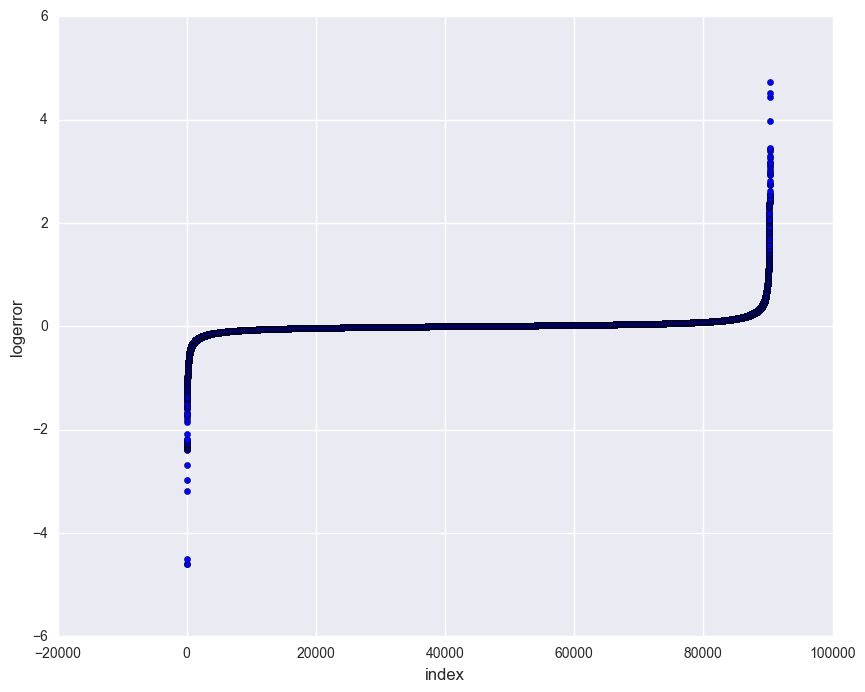

In [12]:
plt.figure(figsize=(10,8))
plt.scatter(range(merged_df.shape[0]), np.sort(merged_df.logerror.values))
plt.xlabel("index", fontsize = 12)
plt.ylabel("logerror", fontsize = 12)
plt.show()

- by setting the upper limit and lower limit trying to remove the outlier values 
- After removing we can see the normal distribution on histogram 

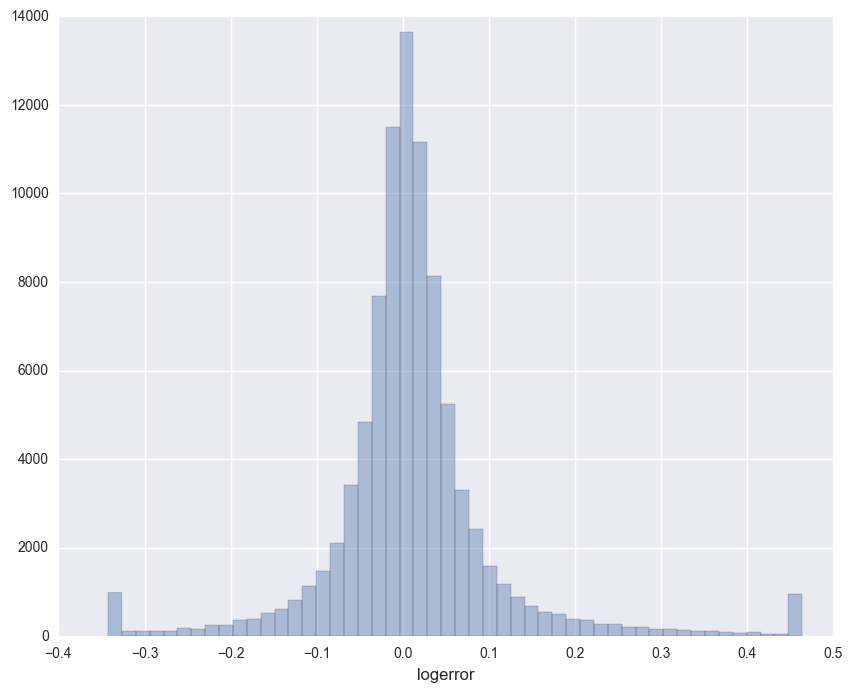

In [15]:
ulimit = np.percentile(merged_df.logerror.values, 99)
llimit = np.percentile(merged_df.logerror.values, 1)

merged_df['logerror'].loc[merged_df['logerror']>ulimit] = ulimit
merged_df['logerror'].loc[merged_df['logerror']<llimit] = llimit

plt.figure(figsize=(10,8))
#fig.set_size_inches(20,5)
sns.distplot(merged_df.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

- In below figure we tried to find out which are the heighest transaction month. 
- As per the graph month june,july,August are heighest 
- that is because september 1 is move in day so maximum transaction occure in july and august 

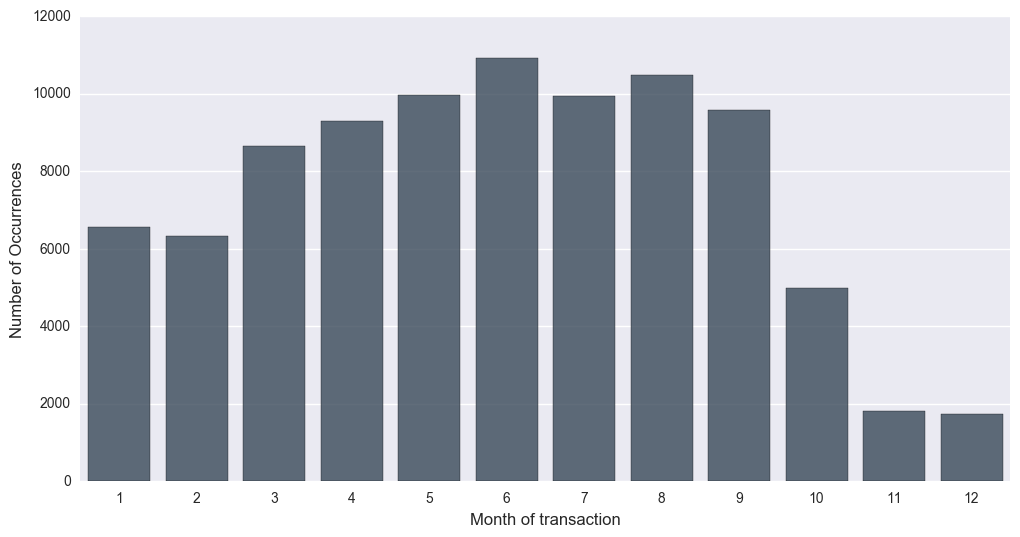

In [26]:
merged_df['transaction_month'] = merged_df['transactiondate'].dt.month

cnt_month = merged_df['transaction_month'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_month.index, cnt_month.values, alpha=0.8, color="#34495e")
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

# Average log error monthwise 

- Below we tried to find out the avg. value of log error monthwise. 

 None]

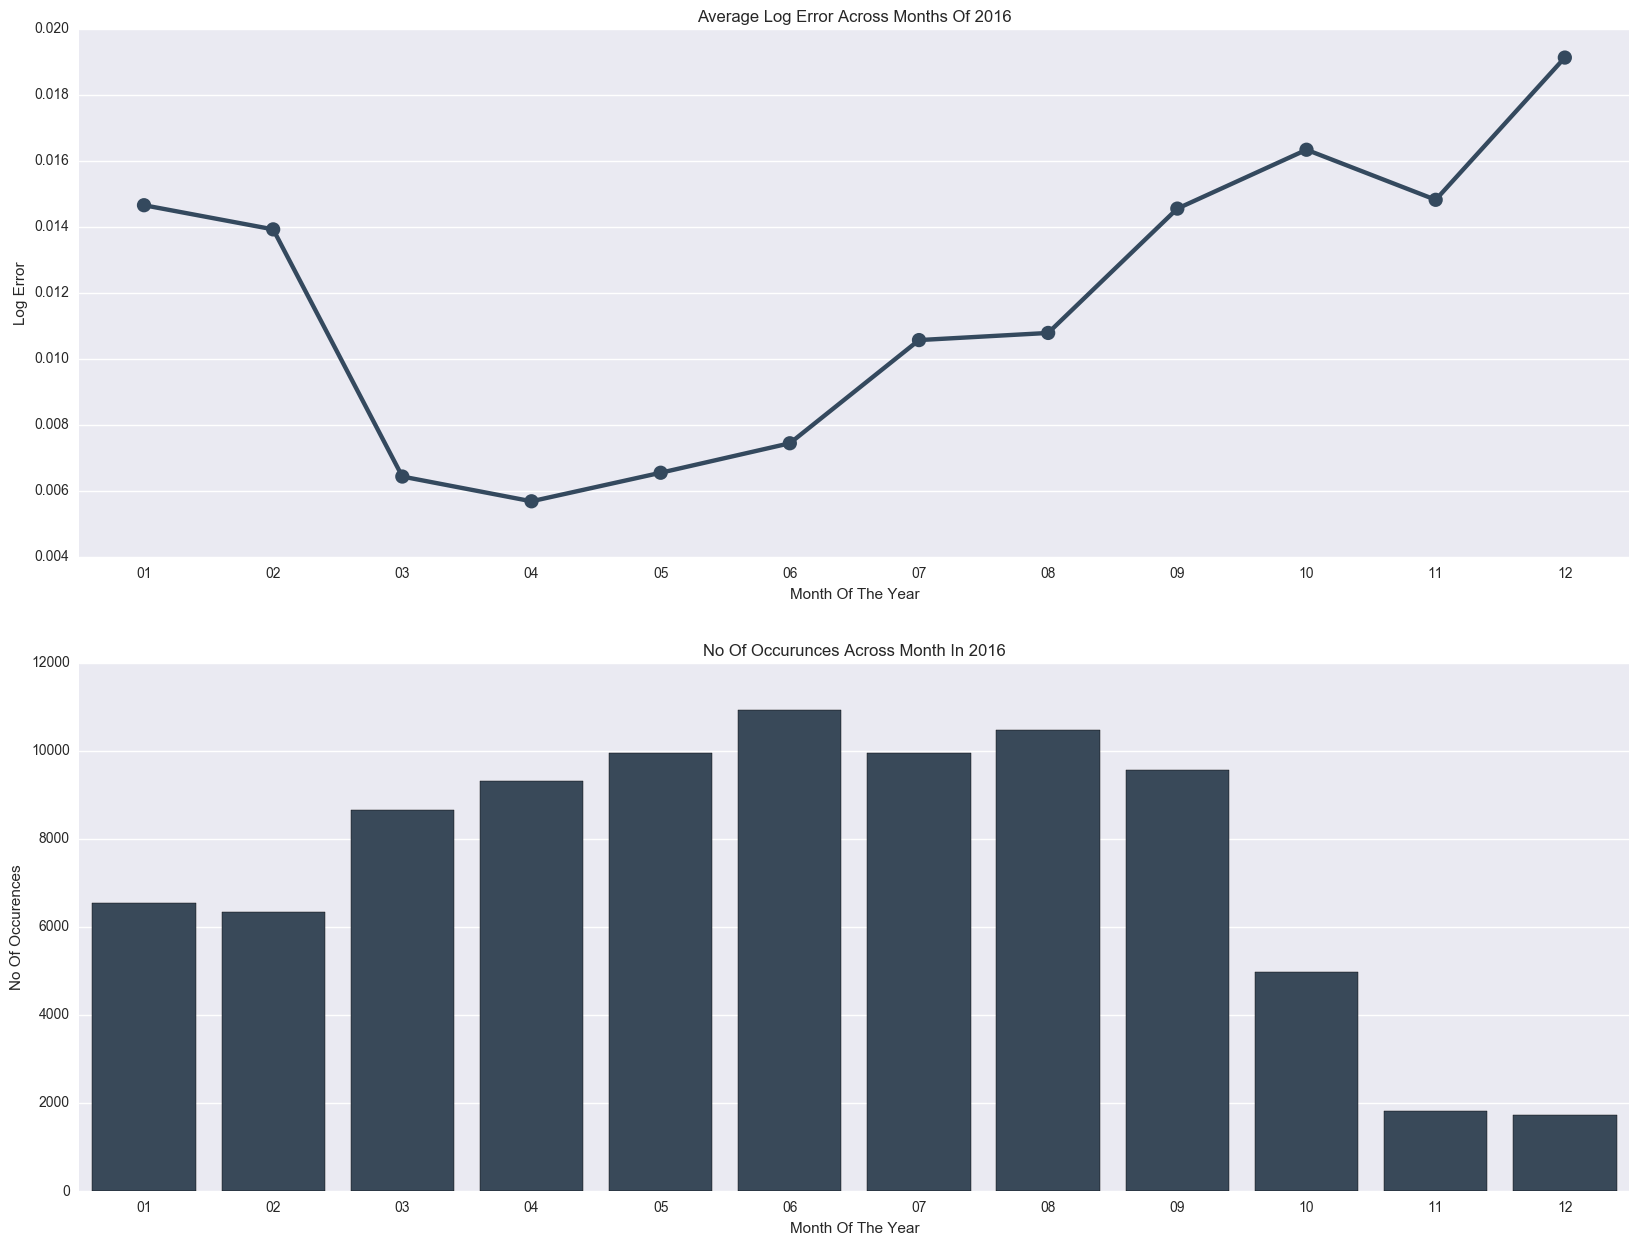

In [17]:
merged_df["year"] = merged_df.transactiondate.map(lambda x: str(x).split("-")[0])
merged_df["month"] = merged_df.transactiondate.map(lambda x: str(x).split("-")[1])
merged_df["day"] = merged_df.transactiondate.map(lambda x: str(x).split("-")[2].split()[0])

mergedGroupedMonth = merged_df.groupby(["month"])["logerror"].mean().to_frame().reset_index()

fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(20,15)


sns.pointplot(x=mergedGroupedMonth["month"], y=mergedGroupedMonth["logerror"], data=mergedGroupedMonth, \
              join=True, ax=ax1, color="#34495e")
ax1.set(xlabel='Month Of The Year', ylabel='Log Error', title="Average Log Error Across Months Of 2016", label='big')

sns.countplot(x=merged_df["month"], data=merged_df, ax=ax2, color="#34495e")
ax2.set(xlabel='Month Of The Year', ylabel='No Of Occurences', title="No Of Occurunces Across Month In 2016", label='big')

- below we tries to find out avg value of lo err daywise in 2016 
- as we can see the err occurences is quite high on 29th day of each month 

 None]

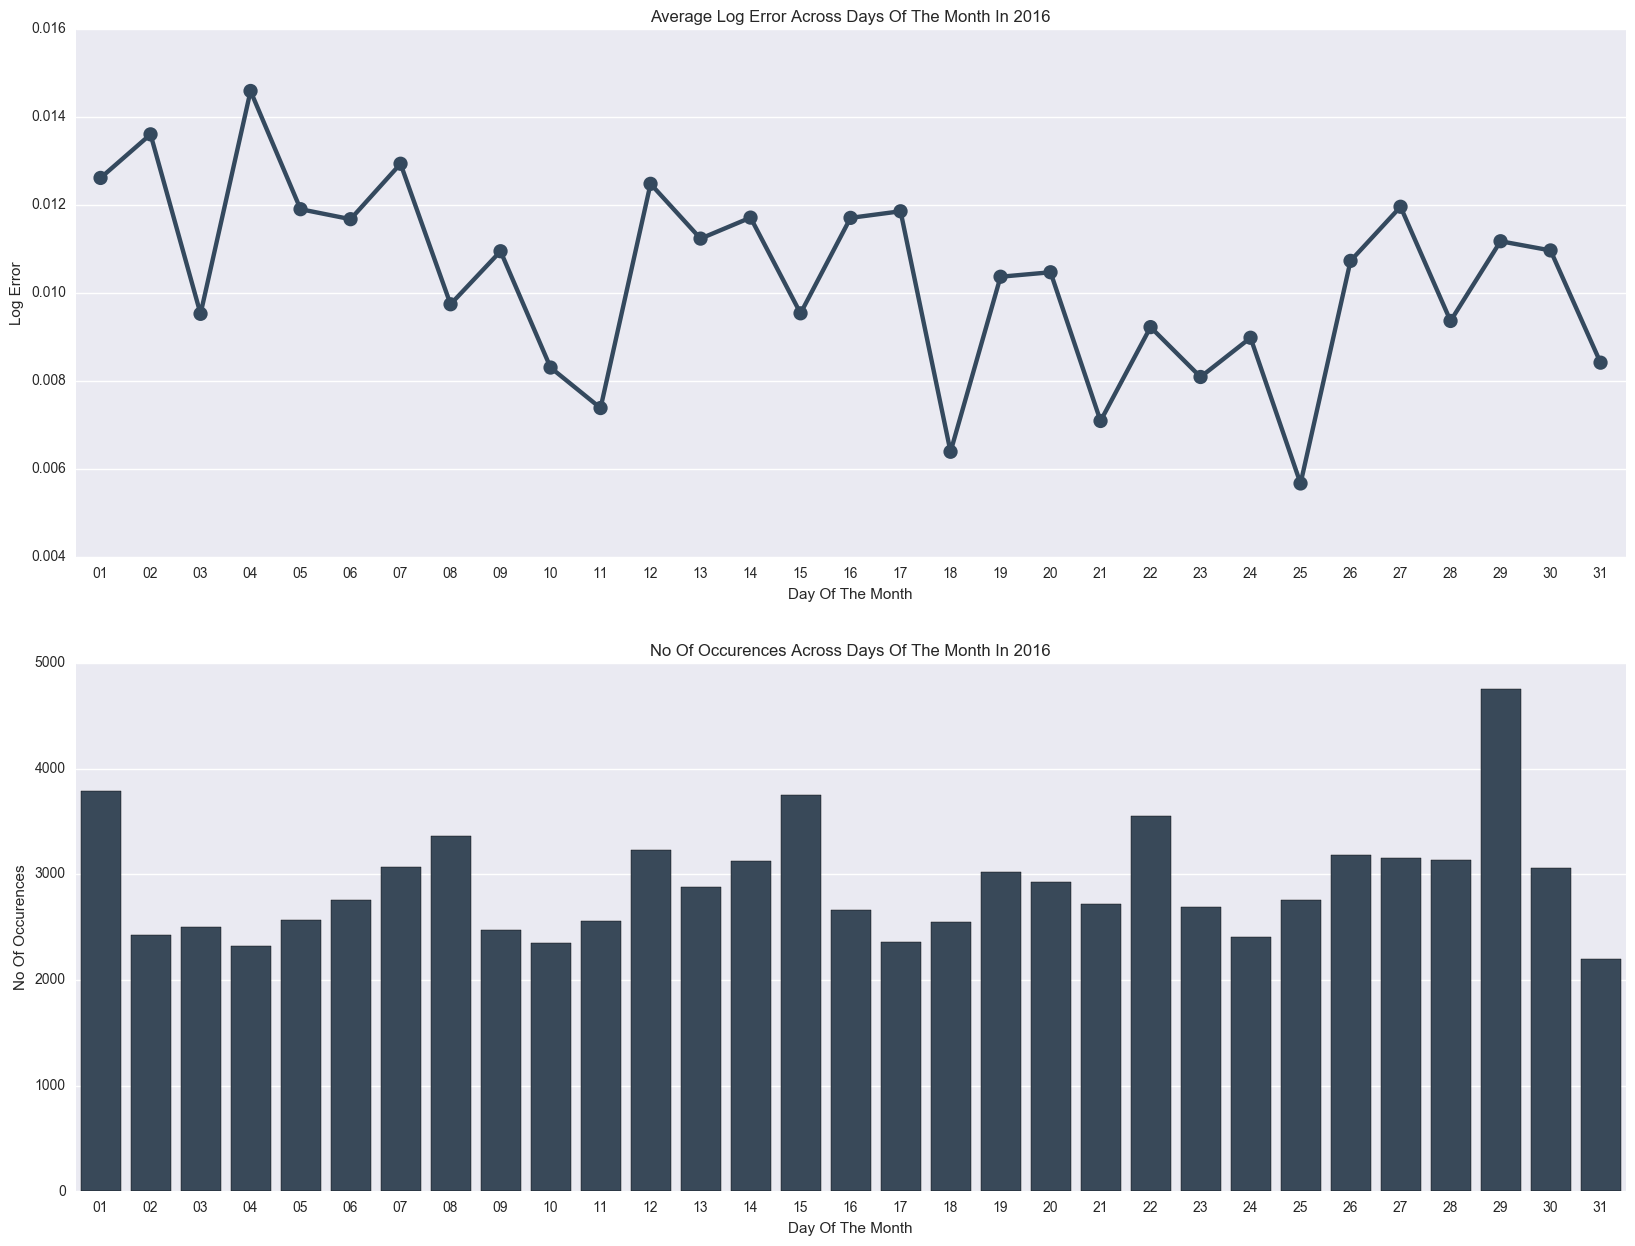

In [18]:
mergedGroupedDay = merged_df.groupby(["day"])["logerror"].mean().to_frame().reset_index()

fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(20,15)

sns.pointplot(x=mergedGroupedDay["day"], y=mergedGroupedDay["logerror"], \
             data=mergedGroupedDay, join=True, ax=ax1, color="#34495e")
ax1.set(xlabel='Day Of The Month', ylabel='Log Error', \
        title="Average Log Error Across Days Of The Month In 2016", label='big')

sns.countplot(x=merged_df["day"], data=merged_df, ax=ax2, color="#34495e")
ax2.set(xlabel='Day Of The Month', ylabel='No Of Occurences',\
        title="No Of Occurences Across Days Of The Month In 2016", label='big')

- We will try to explore value of log error variation against finished squarefeet
- for that first we will remove the outliers in log err

In [19]:
cols = ["bathroomcnt","bedroomcnt","roomcnt","numberofstories","logerror","calculatedfinishedsquarefeet"]
mergedFiltered = merged_df[cols].dropna()
for col in cols:
    ulimit = np.percentile(mergedFiltered[col].values, 99.5)
    llimit = np.percentile(mergedFiltered[col].values, 0.5)
    mergedFiltered[col].ix[mergedFiltered[col]>ulimit] = ulimit
    mergedFiltered[col].ix[mergedFiltered[col]<llimit] = llimit

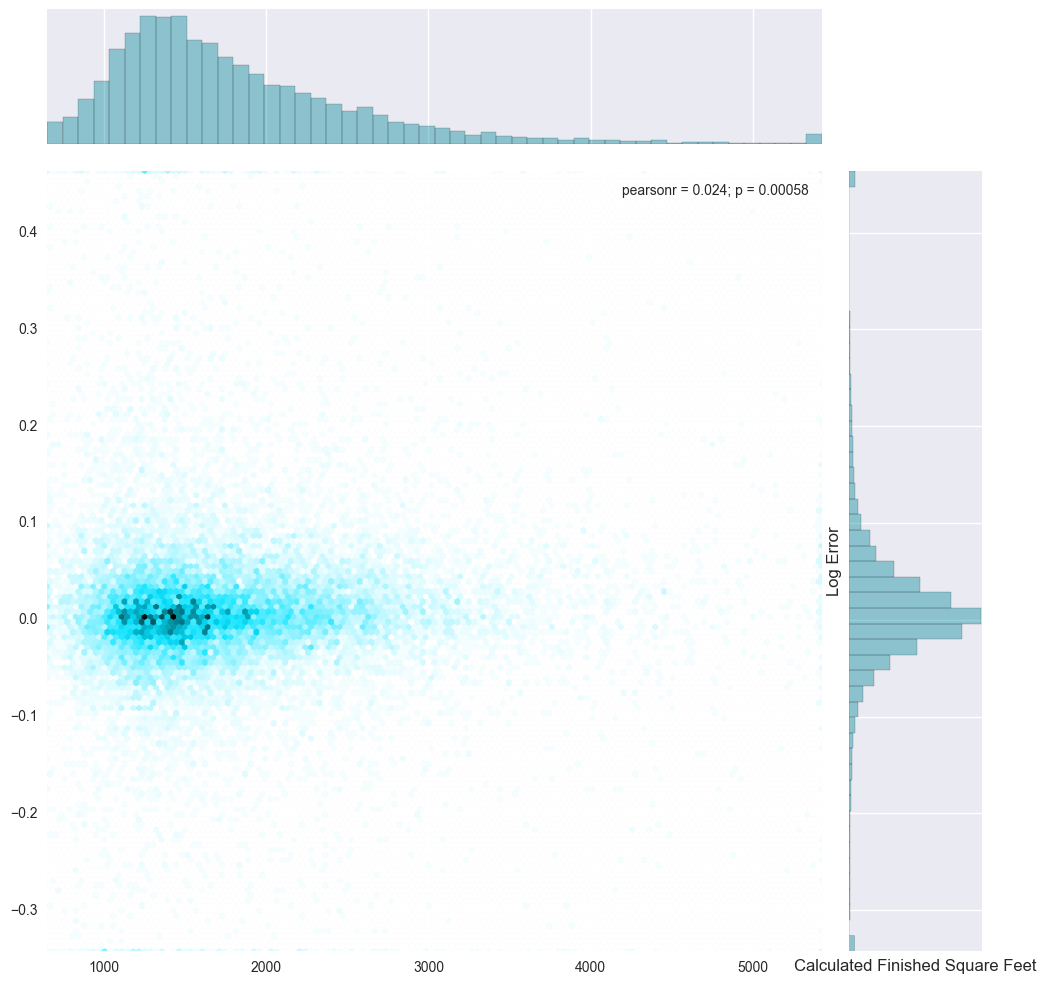

In [27]:
plt.figure(figsize=(8,8))
sns.jointplot(x=mergedFiltered.calculatedfinishedsquarefeet.values,\
             y=mergedFiltered.logerror.values, size=10, kind="hex", color="#008899")
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Calculated Finished Square Feet', fontsize=12)
plt.show()

### Now we will see range of log error according to various aspects  

- Logerror with respect to bedroomcnt

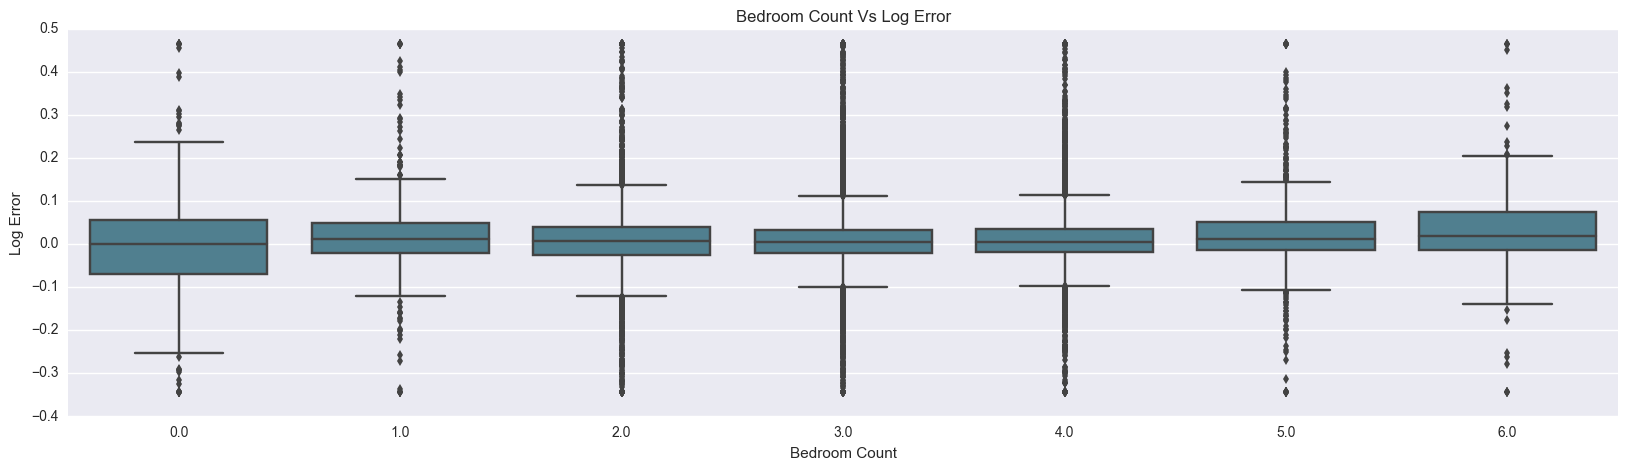

In [28]:
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sns.boxplot(x="bedroomcnt", y="logerror", data=mergedFiltered, ax=ax, color="#468499")
ax.set(ylabel='Log Error', xlabel="Bedroom Count", title="Bedroom Count Vs Log Error")

Bathroomcnt Vs logerr

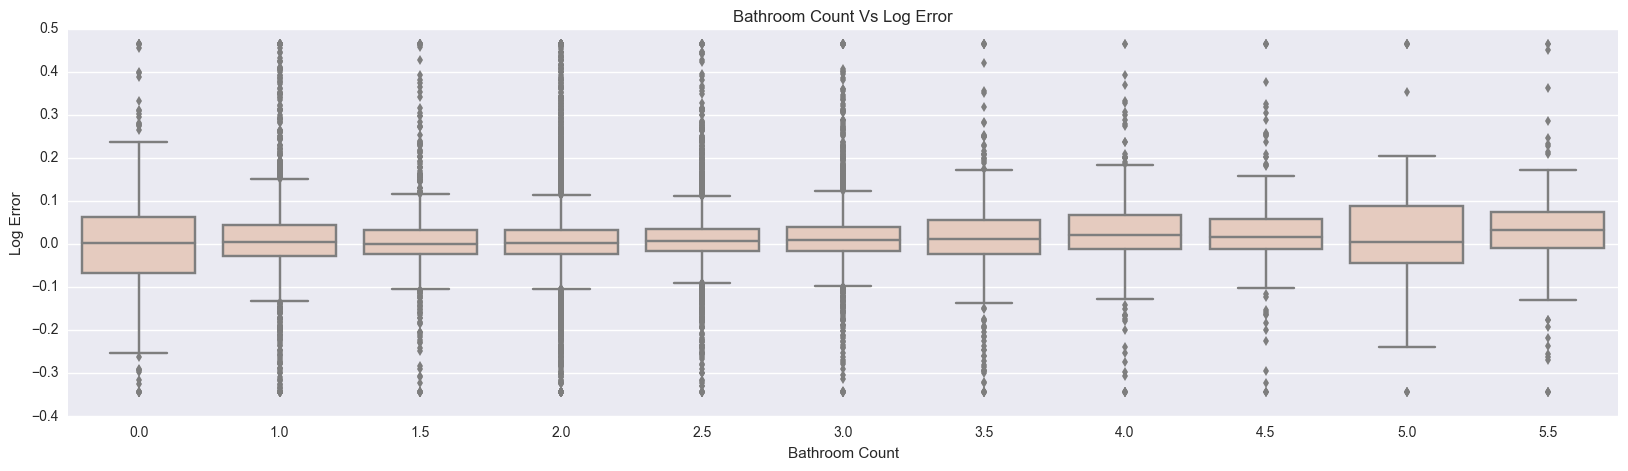

In [22]:
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sns.boxplot(x="bathroomcnt", y="logerror", data=mergedFiltered, ax=ax, color="#ECC8B8")
ax.set(ylabel='Log Error', xlabel="Bathroom Count", title="Bathroom Count Vs Log Error")

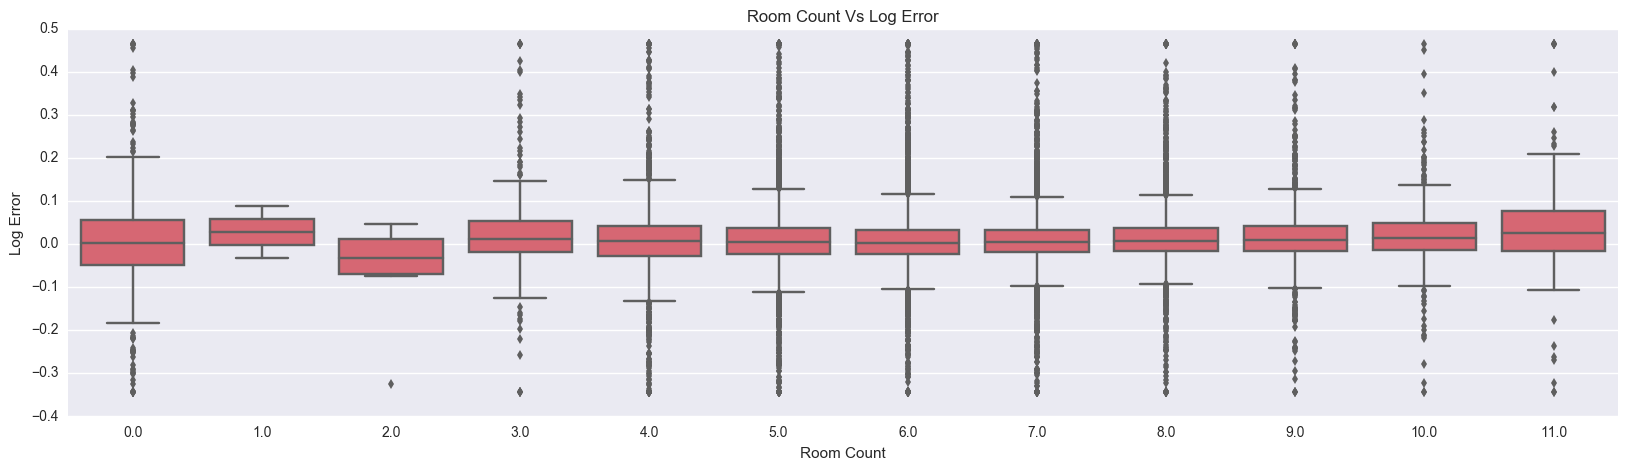

In [23]:
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sns.boxplot(x="roomcnt", y="logerror", data=mergedFiltered, ax=ax, color="#E95464")
ax.set(ylabel='Log Error', xlabel="Room Count", title="Room Count Vs Log Error")

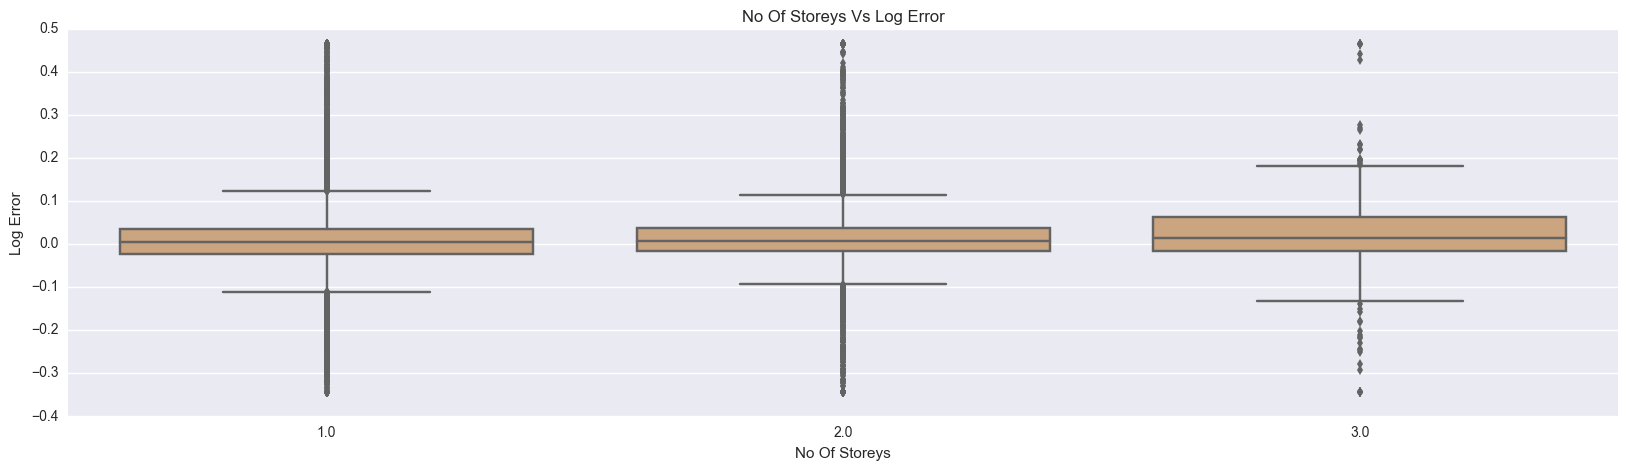

In [24]:
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sns.boxplot(x="numberofstories", y="logerror", data=mergedFiltered, ax=ax, color="#D8A373")
ax.set(ylabel='Log Error', xlabel="No Of Storeys", title="No Of Storeys Vs Log Error")